In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import datetime

SIZE = 30
plt.rc('font', size=SIZE) #controls default text size
plt.rc('axes', titlesize=SIZE) #fontsize of the title
plt.rc('axes', labelsize=SIZE) #fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE) #fontsize of the x tick labels
plt.rc('ytick', labelsize=SIZE) #fontsize of the y tick labels
plt.rc('legend', fontsize=SIZE) #fontsize of the legend

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("data/fcc-forum-pageviews.csv")
df.rename(columns={"value": "page_views"}, inplace=True)

# Clean data
df = df[
    (df["page_views"] >= df["page_views"].quantile(0.025)) &
    (df["page_views"] <= df["page_views"].quantile(0.975))
].reset_index(drop=True)

df["date"] = df["date"].apply(lambda x: datetime.date.fromisoformat(x))

df.head()

,date,page_views
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [56]:
days = ["2016-07-01", "2017-01-01", "2017-07-01", "2018-01-01", "2018-07-01", "2019-01-01", "2019-07-01", "2019-12-01"]
specific_dates = [datetime.date.fromisoformat(d) for d in days]

def next_present_date(date: datetime.date):
    if date in df["date"].values:
        return date
    return next_present_date(date + datetime.timedelta(days=1))

present_dates = [next_present_date(date) for date in specific_dates]
present_dates

[datetime.date(2016, 7, 1),
 datetime.date(2017, 1, 1),
 datetime.date(2017, 7, 1),
 datetime.date(2018, 1, 1),
 datetime.date(2018, 7, 1),
 datetime.date(2019, 1, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 12, 1)]

In [57]:
[df[df["date"] == date].index[0] for date in present_dates]

[24, 205, 386, 570, 751, 932, 1111, 1236]

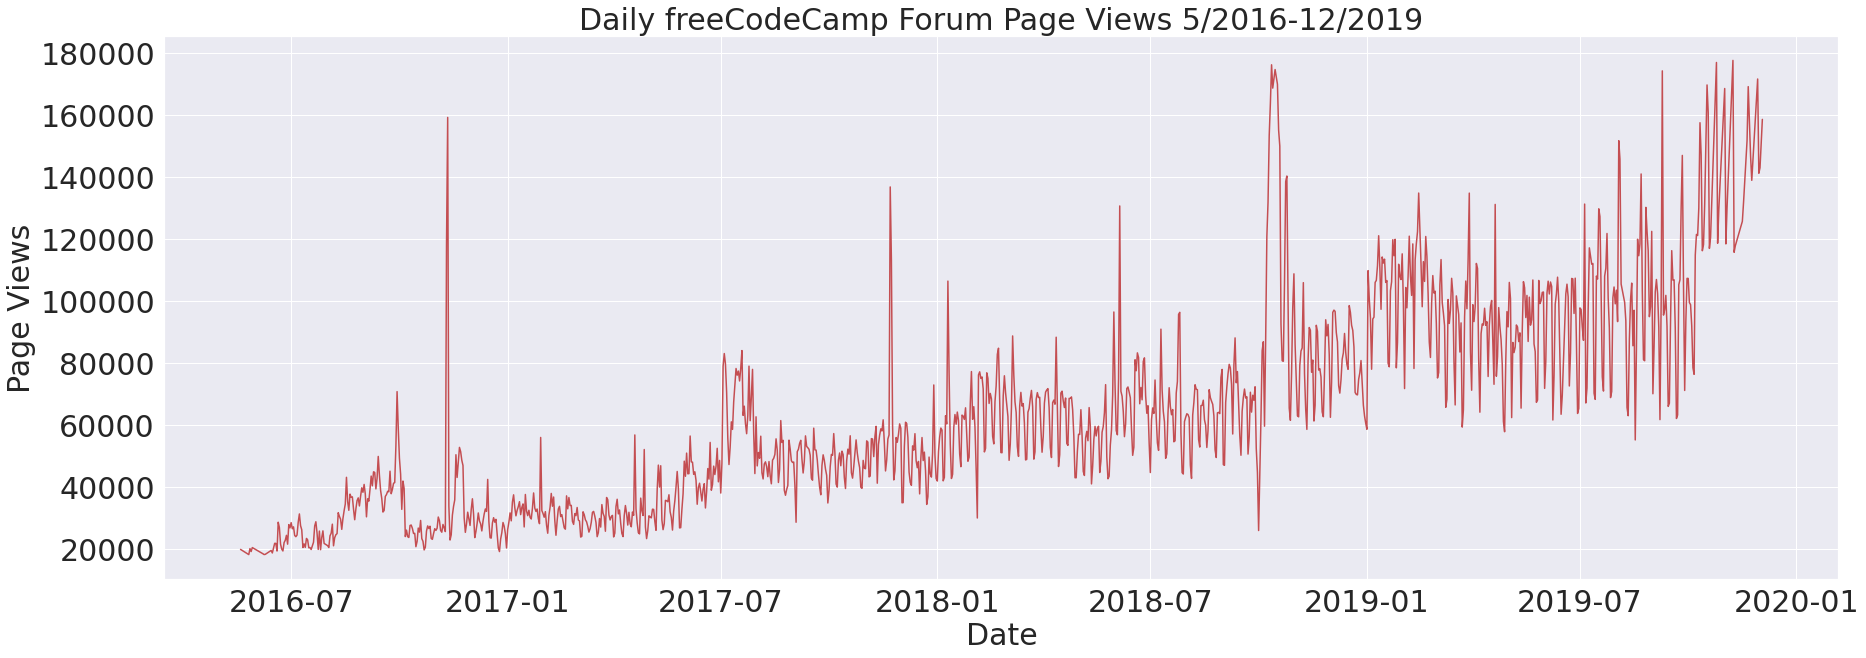

In [65]:
from datetime import date, timedelta

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(30, 10))
    # ax.set_xticks(
    #         ticks=[df[df["date"] == date].index[0] for date in present_dates],
    #         labels=["2016-07", "2017-01", "2017-07", "2018-01", "2018-07", "2019-01", "2019-07", "2020-01"],
    # )

    ax.plot(df["date"], df["page_views"], "r")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png', bbox_inches = "tight")

draw_line_plot()

In [69]:
import datetime

month_names = ("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar["year"] = df_bar["date"].apply(lambda date: date.year)
df_bar["month"] = df_bar["date"].apply(lambda date: date.strftime("%B"))
df_bar.drop(columns="date")
df_bar = df_bar.groupby(["year", "month"], sort=False).sum().reset_index() # .sort_values(axis=0, by=["year", "month"], key=sort_f)
df_bar.head()

,year,month,page_views
0,2016,May,97162
1,2016,June,415627
2,2016,July,675071
3,2016,August,962525
4,2016,September,1244306


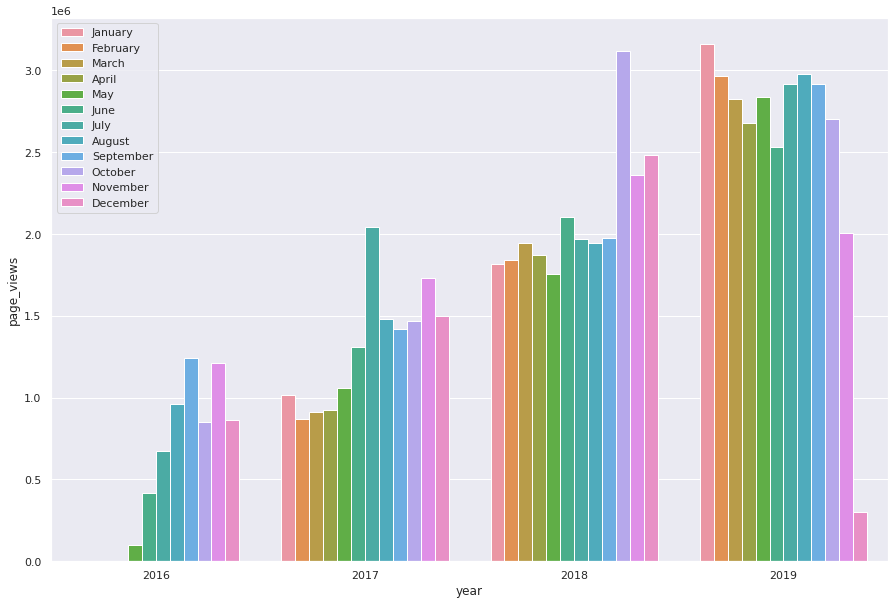

In [84]:
sns.set(rc={"figure.figsize":(15, 10)})

ax = sns.barplot(x="year", y="page_views", hue="month", data=df_bar, hue_order=month_names)
ax.legend(loc="upper left")
fig = ax.get_figure()
fig.savefig("barplot.png", bbox_inches="tight")

In [72]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
# df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,page_views,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


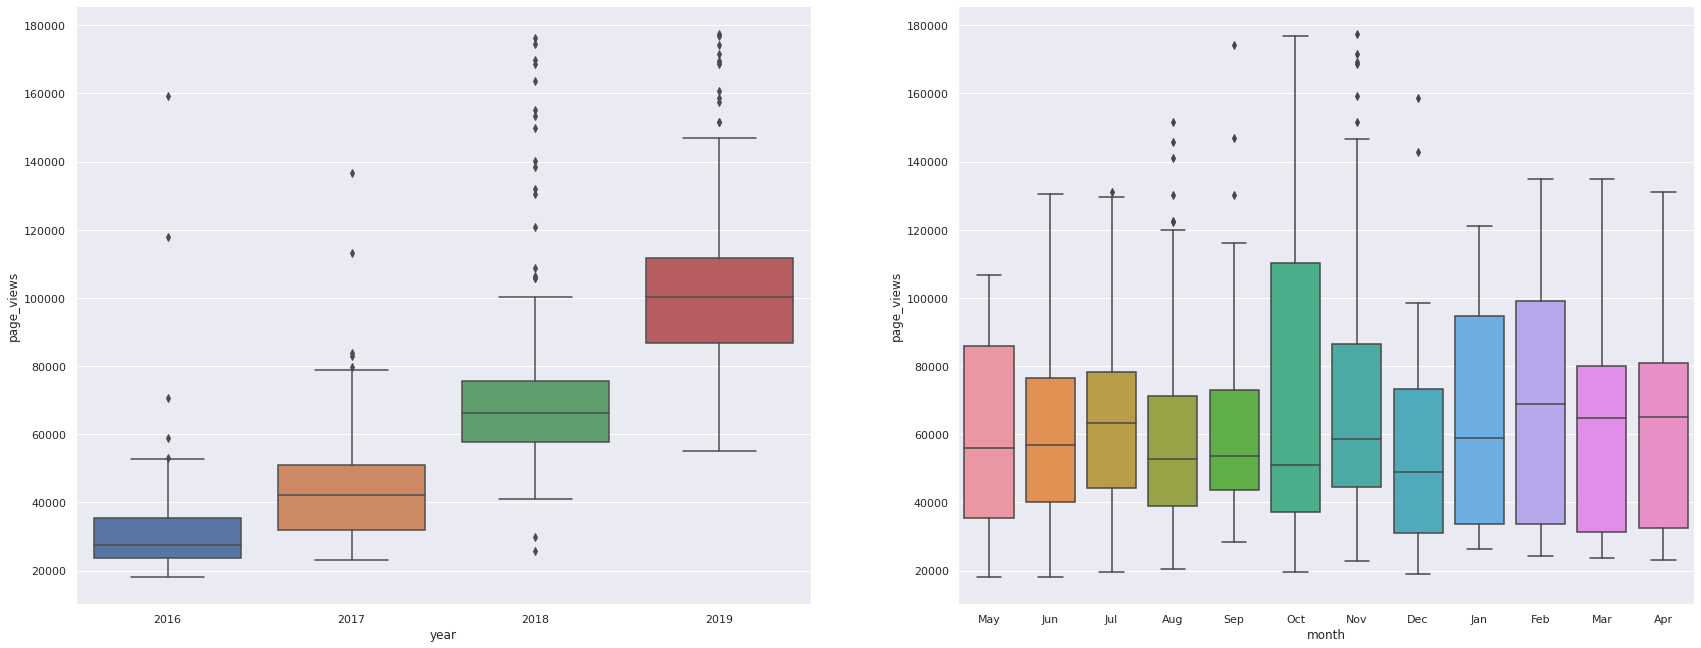

In [85]:
# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(29, 11))

sns.boxplot(data=df_box, x="year", y="page_views", ax=axes[0])
sns.boxplot(data=df_box, x="month", y="page_views", ax=axes[1])



# Save image and return fig (don't change this part)
fig.savefig('box_plot.png', bbox_inches="tight")